<a href="https://colab.research.google.com/github/OCanSagbas/K-Means-Clustering-for-Image-Segmentation/blob/main/K_Means_Clustering_for_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

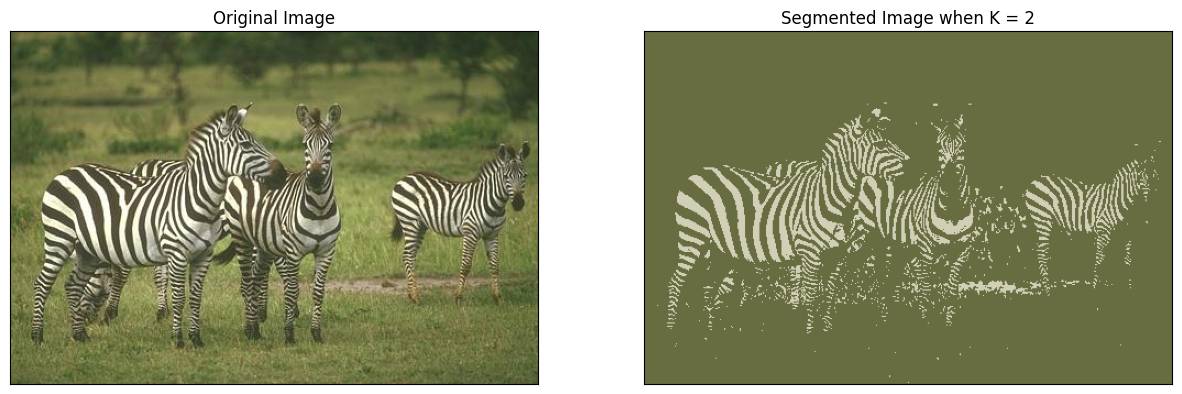

In [ ]:
original_image = cv2.imread("/content/253027.jpg")
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

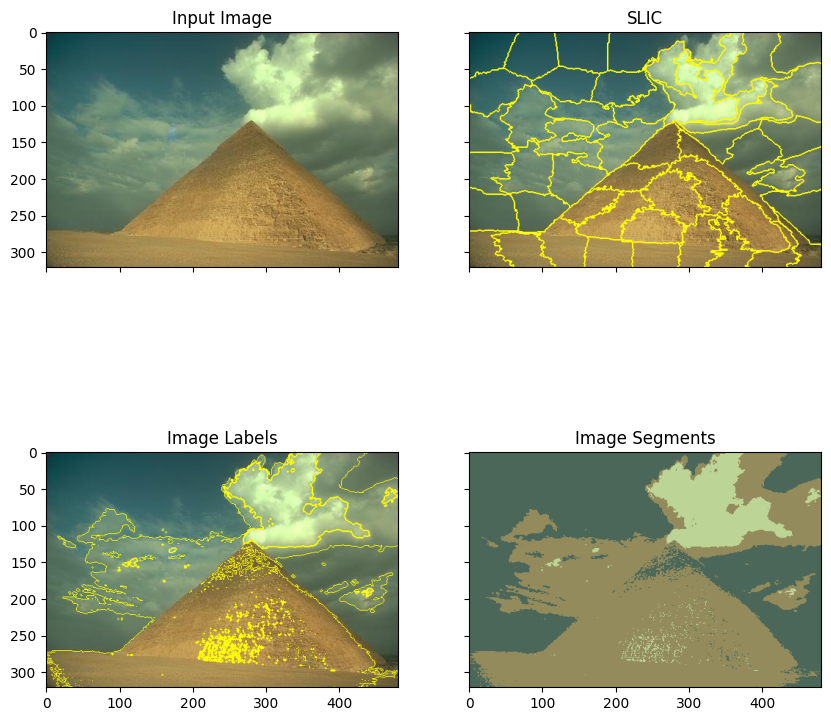

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.segmentation import slic, mark_boundaries


# Read the image
original_image = cv2.imread("/content/299091.jpg")
img = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Apply SLIC segmentation
num_segments = 50  # You can adjust this parameter based on your needs
segments = slic(img, n_segments=num_segments, sigma=0)


# Convert the image to a feature vector representation
vectorized_img = img.reshape((-1, 3))

# Apply K-means clustering to the feature vectors
K = 3
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts = 10
ret, label, center = cv2.kmeans(np.float32(vectorized_img), K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

# Reshape the labels and centers to match the original image shape
labels_reshaped = label.reshape(img.shape[:2])
center_colors = np.uint8(center)
center_colors_resized = center_colors[labels_reshaped]

# Visualize the input image, superpixels, image labels, and image segments
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

ax[0,0].imshow(img)
ax[0,0].set_title('Input Image')

ax[0, 1].imshow(mark_boundaries(img, segments))
ax[0, 1].set_title('SLIC')

ax[1,0].imshow(mark_boundaries(img,labels_reshaped))
ax[1,0].set_title('Image Labels')

ax[1, 1].imshow(center_colors_resized)
ax[1, 1].set_title('Image Segments')
plt.show()


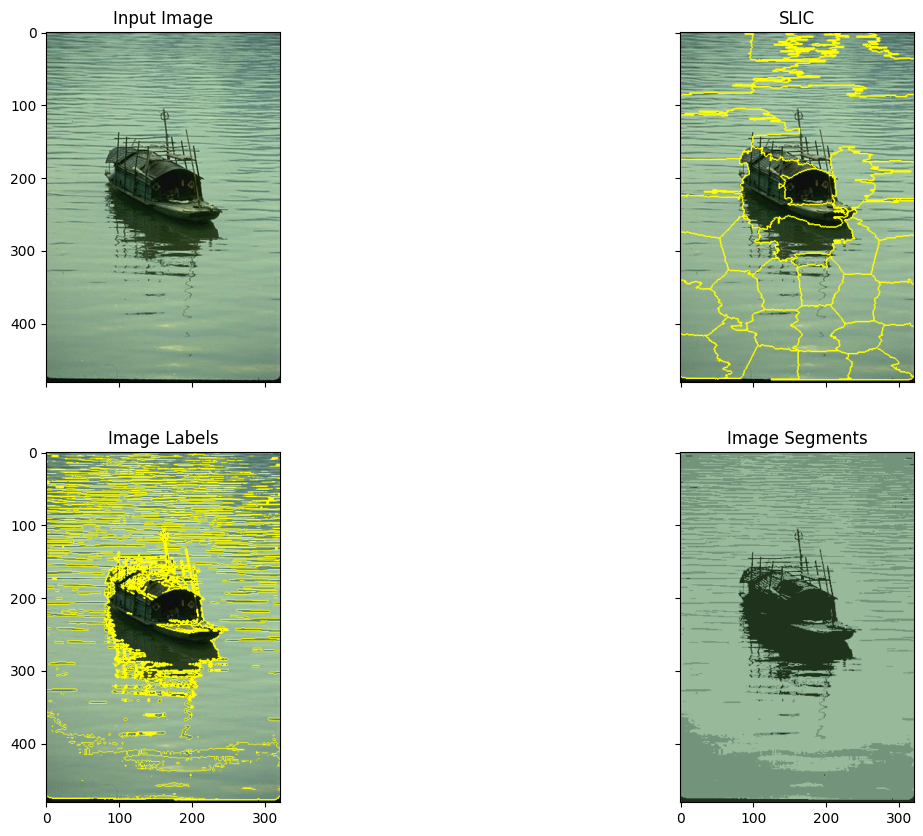

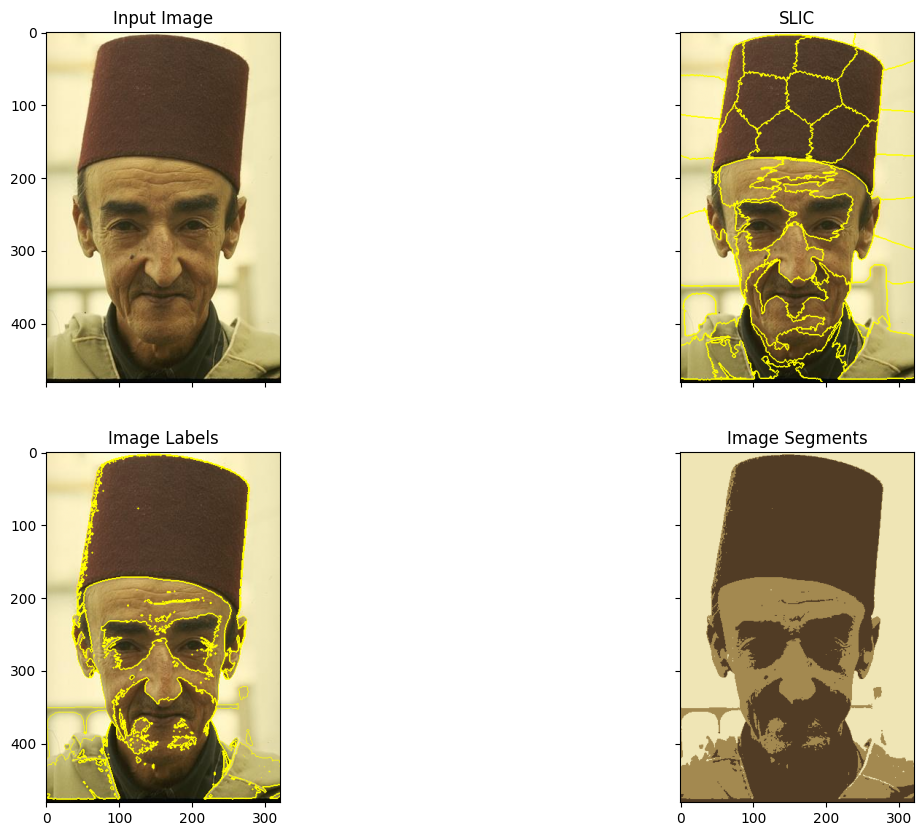

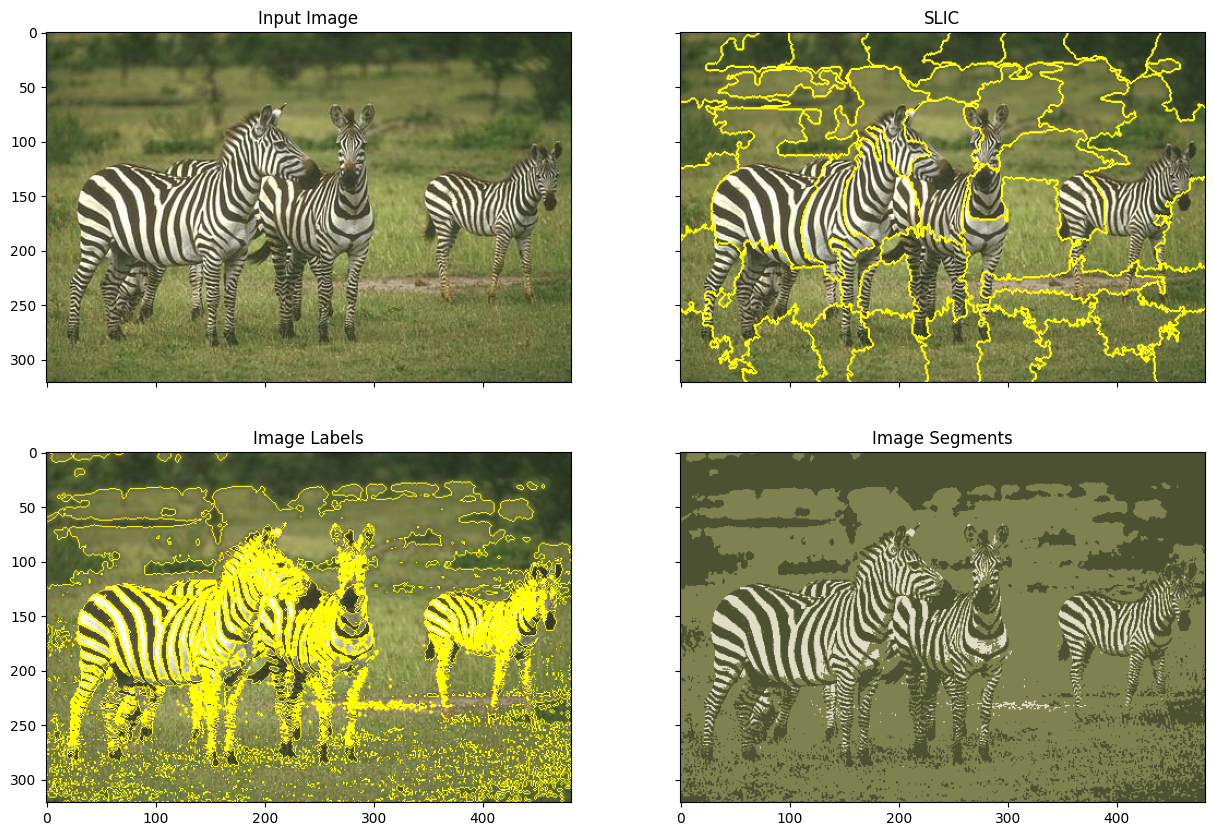

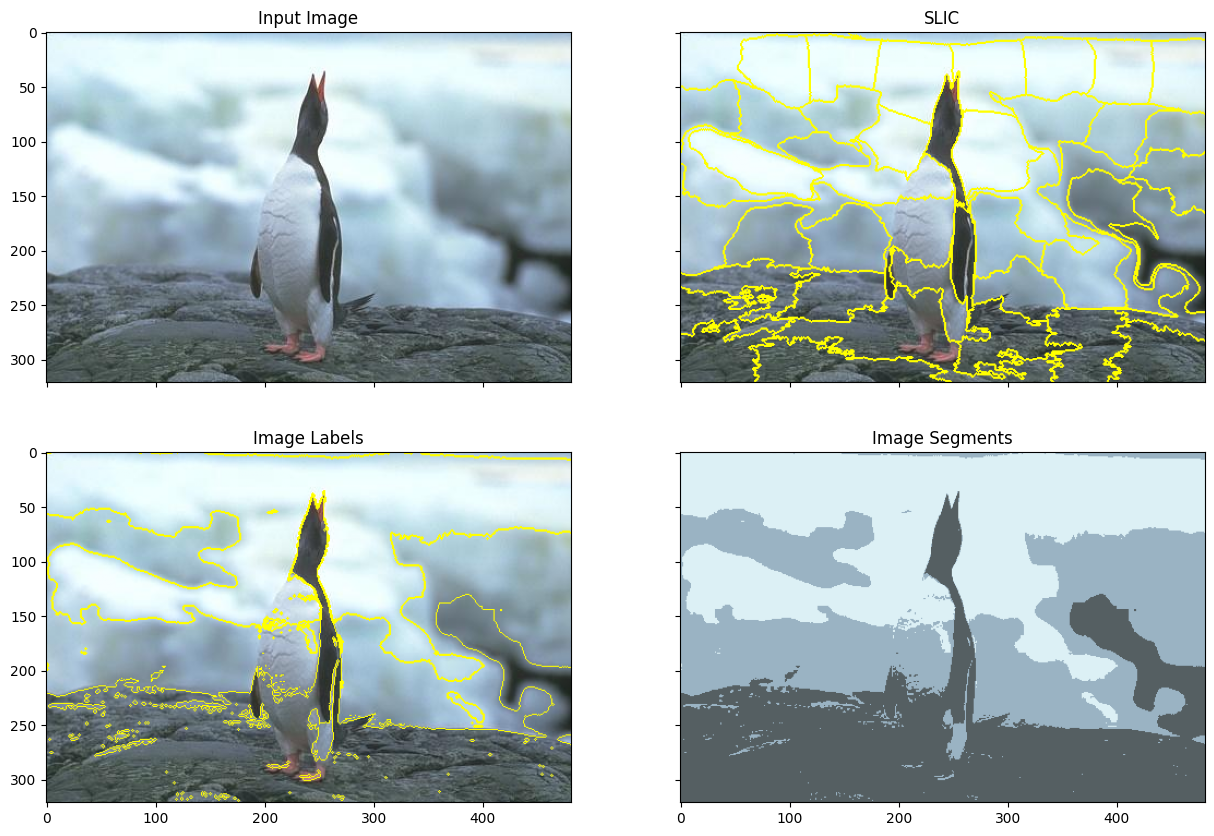

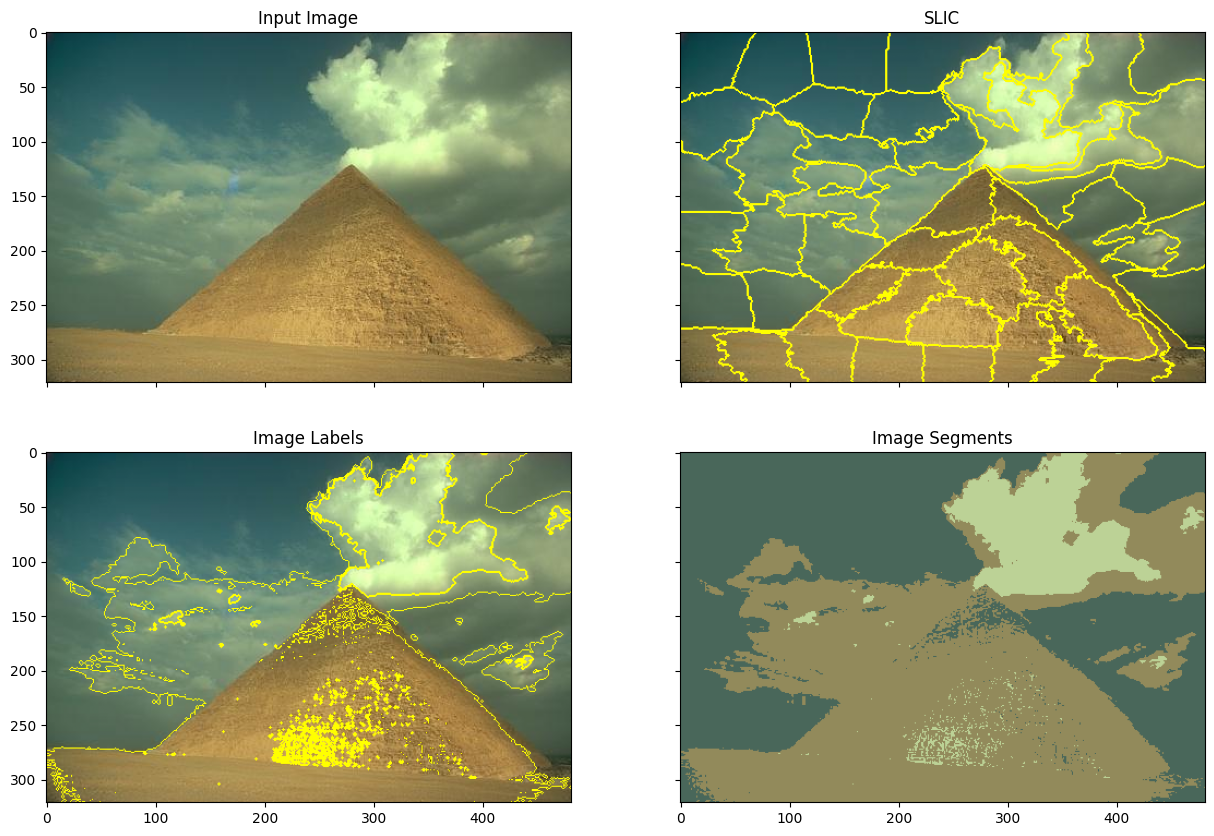

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.segmentation import slic

# Get the list of image files in the "content" directory
image_files = [f for f in os.listdir("/content") if f.endswith(('.jpg', '.jpeg', '.png'))]

# Iterate through each image file
for image_file in image_files:
    # Read the image
    original_image = cv2.imread(os.path.join("/content", image_file))
    img = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # Apply SLIC segmentation
    num_segments = 50
    segments = slic(img, n_segments=num_segments, sigma=0)

    # Convert the image to a feature vector representation
    vectorized_img = img.reshape((-1, 3))

    # Apply K-means clustering to the feature vectors
    K = 3
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    attempts = 10
    ret, label, center = cv2.kmeans(np.float32(vectorized_img), K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

    # Reshape the labels and centers to match the original image shape
    labels_reshaped = label.reshape(img.shape[:2])
    center_colors = np.uint8(center)
    center_colors_resized = center_colors[labels_reshaped]

    # Visualize the input image, superpixels, image labels, and image segments
    fig, ax = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)

    ax[0, 0].imshow(img)
    ax[0, 0].set_title('Input Image')

    ax[0, 1].imshow(mark_boundaries(img, segments))
    ax[0, 1].set_title('SLIC')

    ax[1, 0].imshow(mark_boundaries(img, labels_reshaped))
    ax[1, 0].set_title('Image Labels')

    ax[1, 1].imshow(center_colors_resized)
    ax[1, 1].set_title('Image Segments')

    # Show or save the visualization (you can choose either)
    plt.show()
    # plt.savefig(os.path.join("/content", "output_" + image_file))  # Save the visualization with a different name
